
1. Kütüphaneyi import etme

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings # "warnings" modülü sayesinde programın çıktısındaki uyarıların konsolda görülmesini engellenir
warnings.filterwarnings("ignore")


2. Veri setini yükleme ve eğitim-test kümelerine bölme

In [2]:
fashion_mnist =tf.keras.datasets.fashion_mnist

(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

3.Boyutlarını yazdırma

In [3]:
print("X_train boyutu:", X_train.shape)
print("y_train boyutu:", y_train.shape)
print("X_test boyutu:", X_test.shape)
print("y_test boyutu:", y_test.shape)


X_train boyutu: (60000, 28, 28)
y_train boyutu: (60000,)
X_test boyutu: (10000, 28, 28)
y_test boyutu: (10000,)


4. Eğitim ve Test Kümesindeki Verileri İndekse Göre Görselleştirme

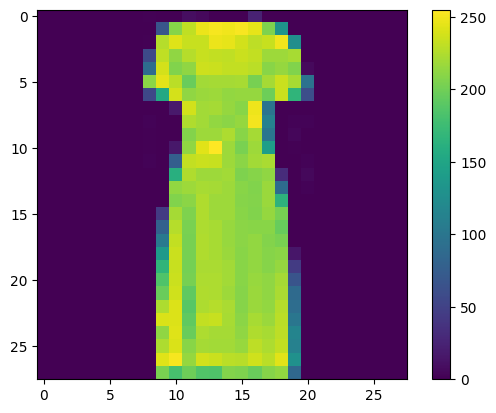

In [4]:
plt.figure()
plt.imshow(X_train[50]) # Eğitim verisinde 50.indeksteki veriyi görselleştirdik.
plt.colorbar()
plt.grid(False)
plt.show()


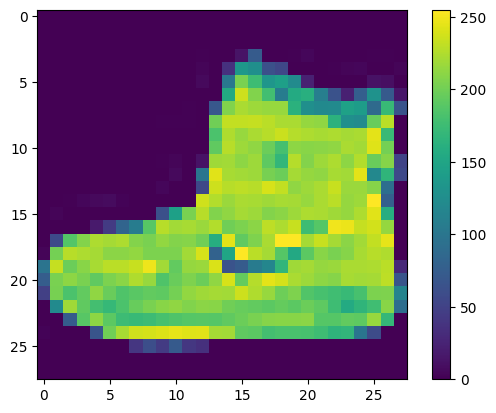

In [5]:
plt.figure()
plt.imshow(X_train[0]) # Eğitim verisinde 0.indeksteki veriyi görselleştirdik.
plt.colorbar()
plt.grid(False)
plt.show()


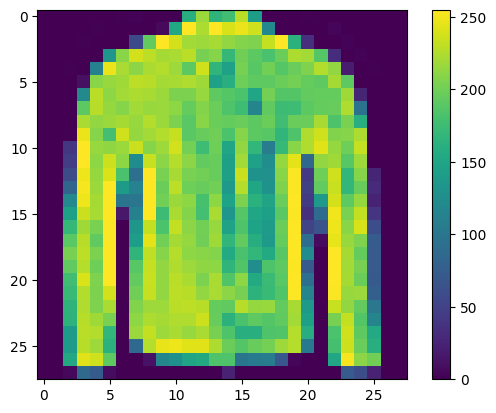

In [6]:
plt.figure()
plt.imshow(X_test[50]) # Test verisinde 50.indeksteki veriyi görselleştirdik.
plt.colorbar()
plt.grid(False)
plt.show()



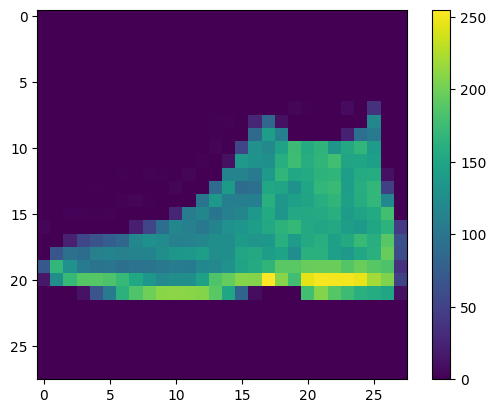

In [7]:
plt.figure()
plt.imshow(X_test[0]) # Eğitim verisinde 0.indeksteki veriyi görselleştirdik.
plt.colorbar()
plt.grid(False)
plt.show()

5. Veri Normalleştirme

In [8]:
X_train = X_train / 255.0 # 255 piksel değerine ulaştığı için 255.0'a böldük

X_test = X_test / 255.0

6.Toplu Veri Görselleştirme

*Eğitim ve Test Kümeleri için*

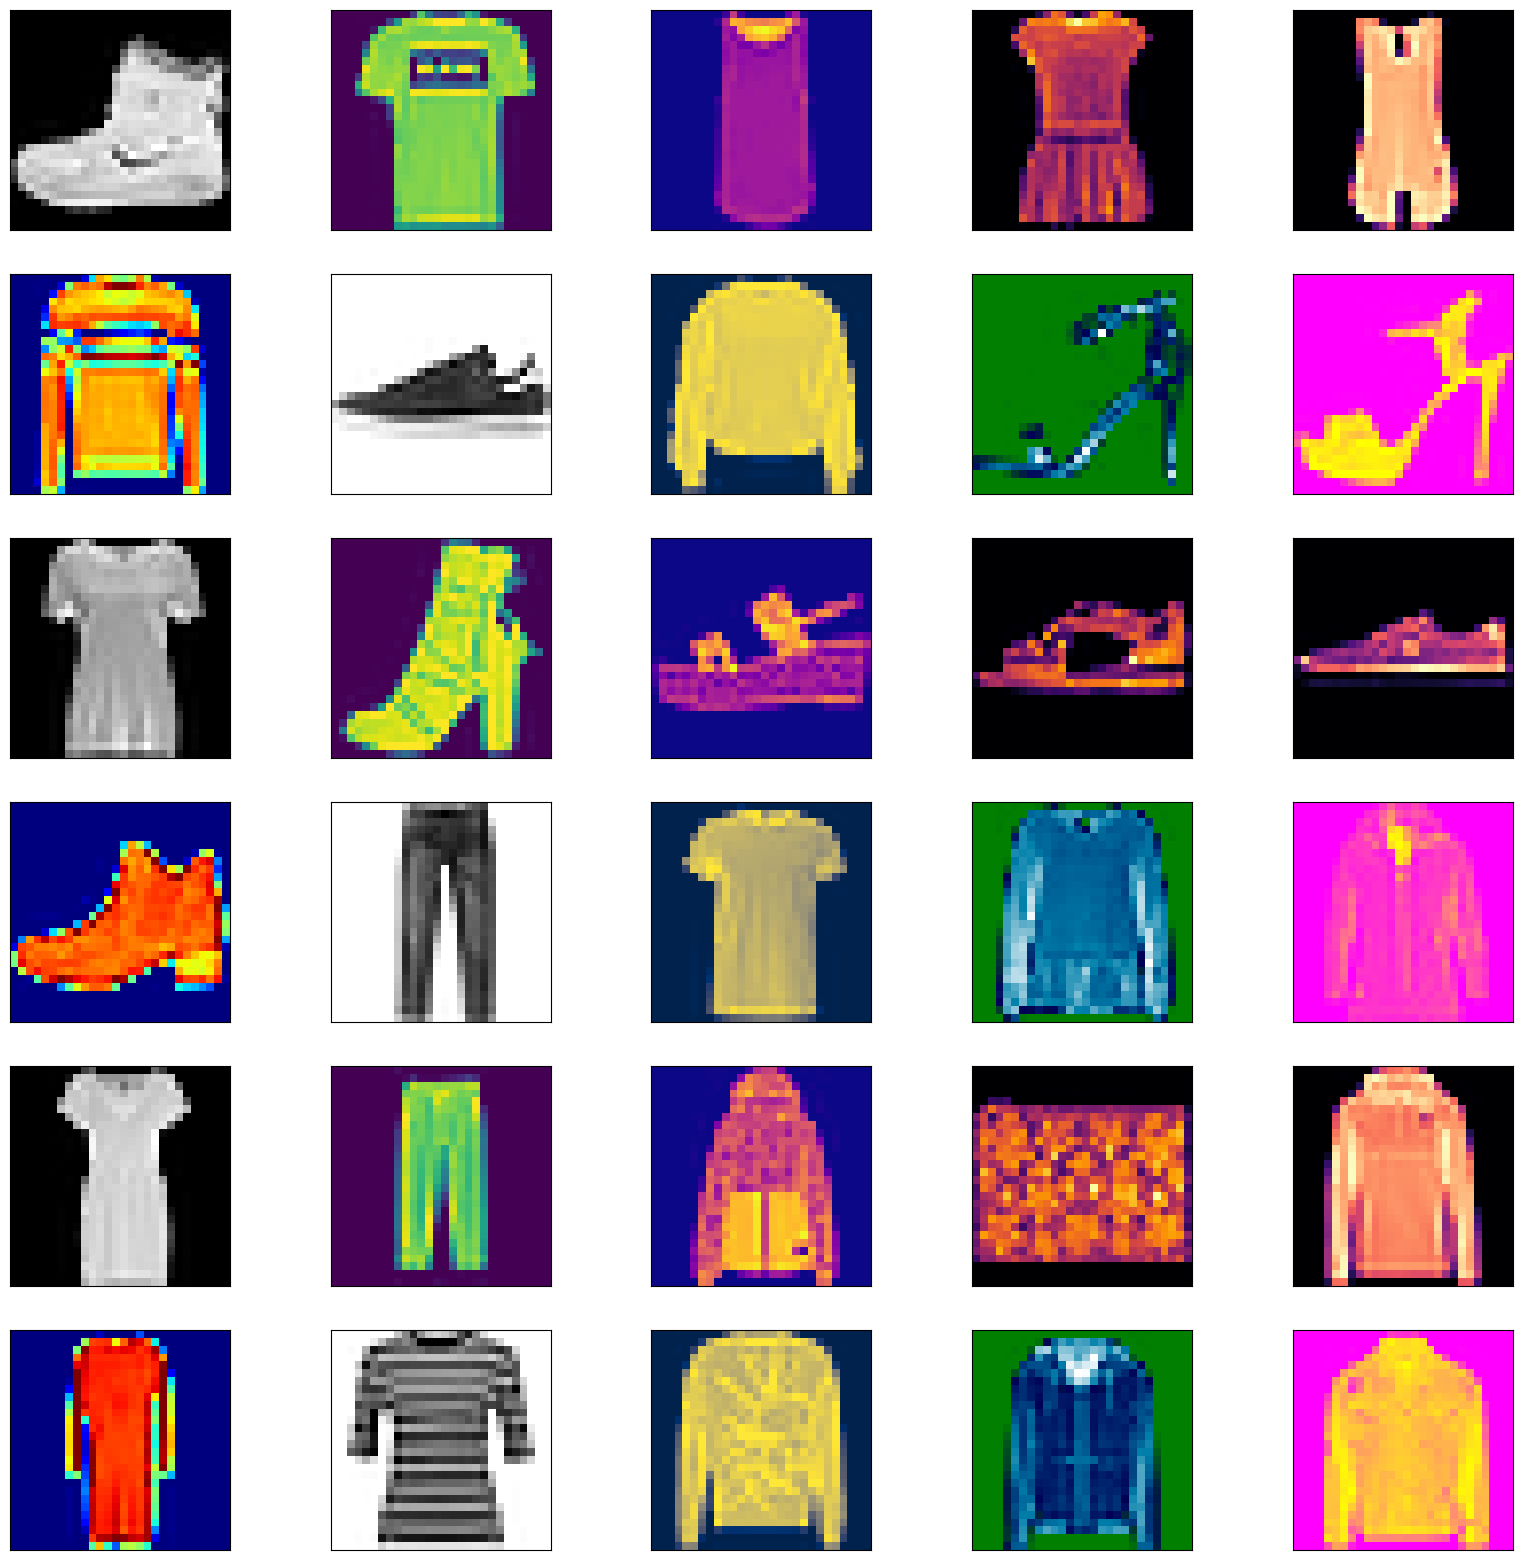

In [9]:
plt.figure(figsize=(20,20))
color_maps = ['gray', 'viridis', 'plasma', 'inferno', 'magma', 'jet', 'binary', 'cividis', 'ocean', 'spring']

for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    cmap_choice = color_maps[i % len(color_maps)]  # Renk haritasından sırayla renkleri seçtirdik.
    plt.imshow(X_train[i], cmap=cmap_choice)
plt.show()

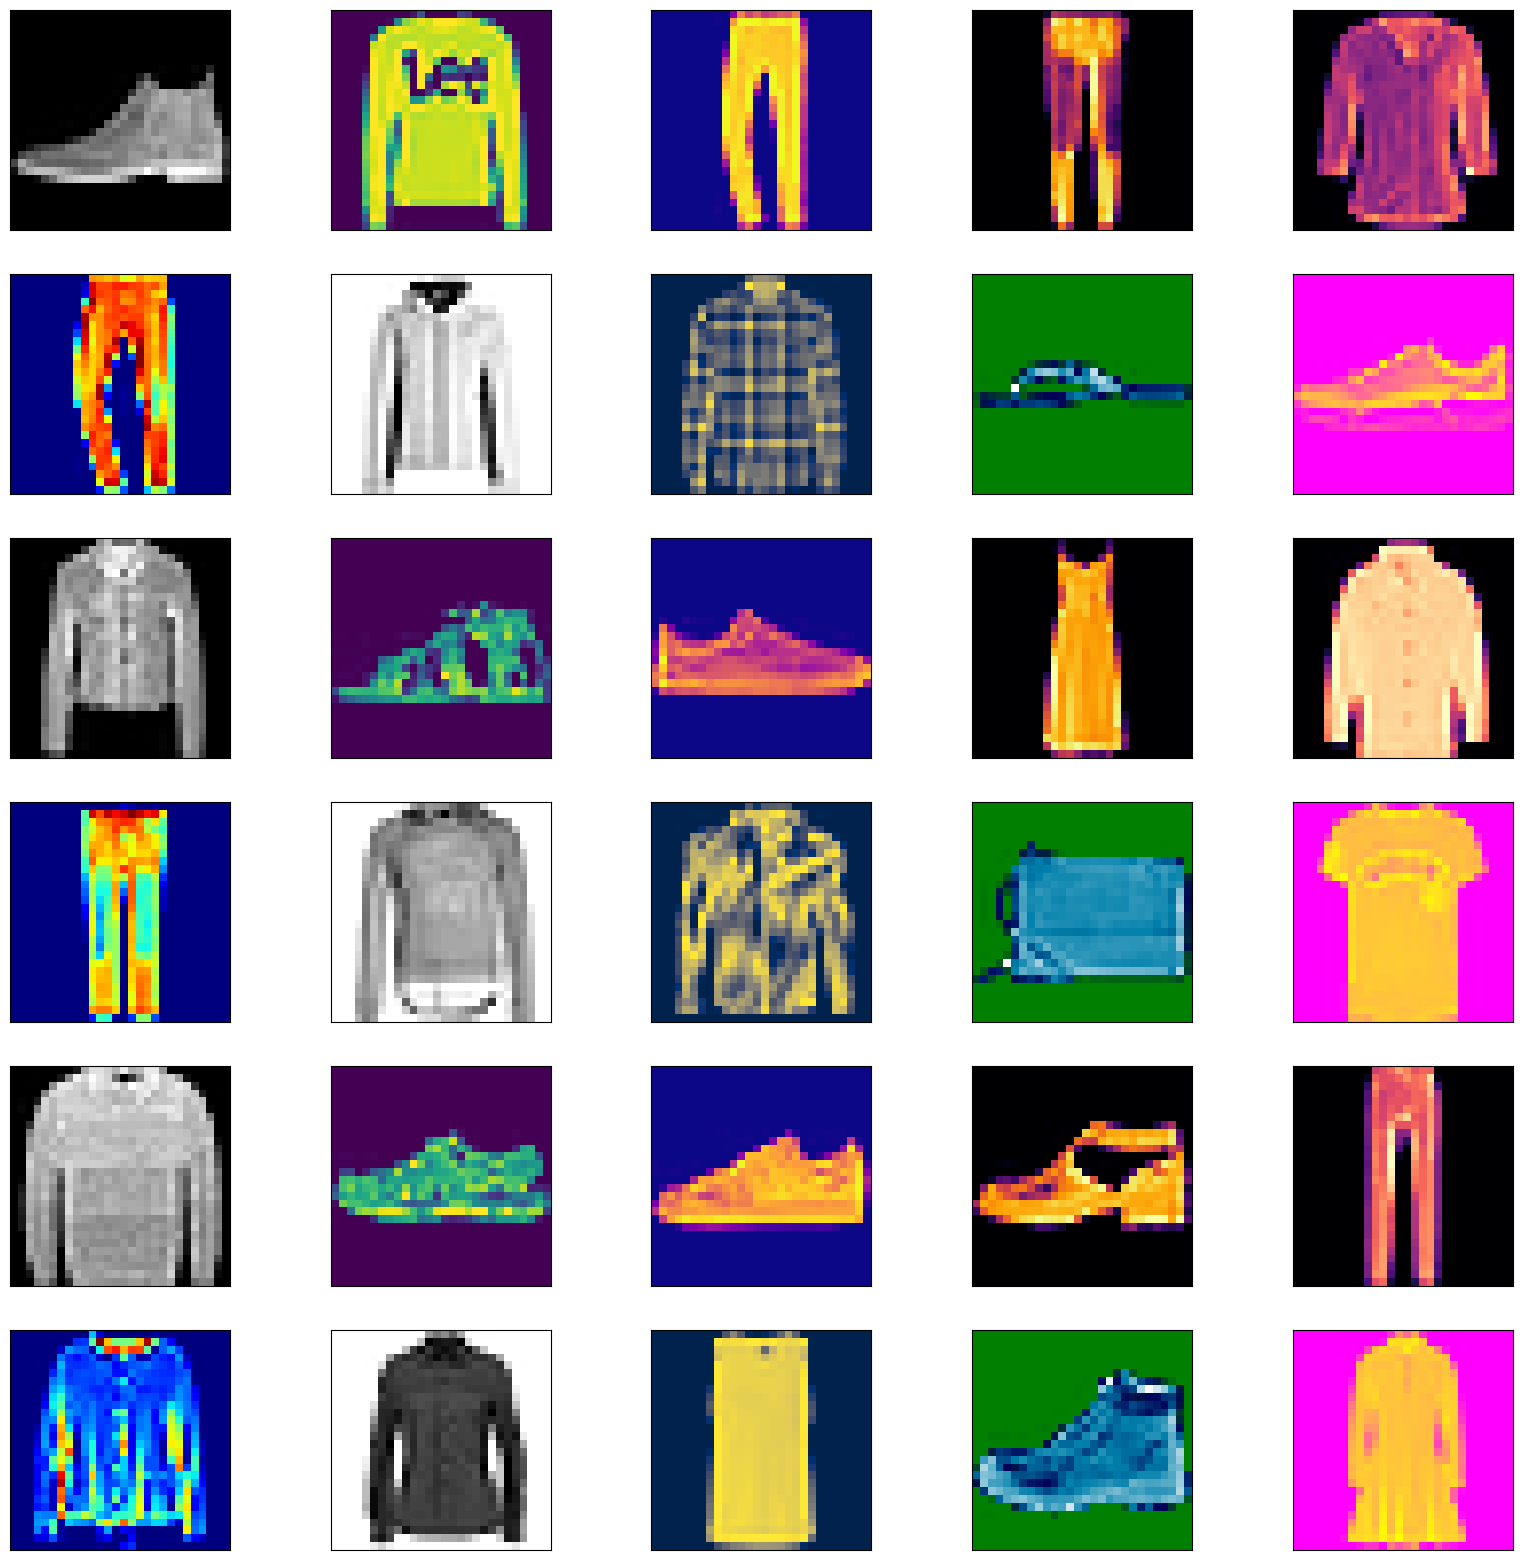

In [10]:
plt.figure(figsize=(20,20))
color_maps = ['gray', 'viridis', 'plasma', 'inferno', 'magma', 'jet', 'binary', 'cividis', 'ocean', 'spring']

for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    cmap_choice = color_maps[i % len(color_maps)]  # Renk haritasından sırayla renkleri seçtirdik.
    plt.imshow(X_test[i], cmap=cmap_choice)
plt.show()

# **7.Makine Öğrenmesi**

In [11]:
X_train.shape[0] # Eğitim verisinin shape'inde ilk değeri yazdırdık.

60000

8.Veri Düzleştirme

In [12]:
X_train = X_train.reshape(X_train.shape[0], 28 * 28) # Verileri 28x28 görüntü formatından 784 özellikli vektörlere düzleştirdik 
X_train.reshape(60000,784)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

9.Makine Öğrenimini Çeşitli Modeller Üzerinde Uygulama

*KNN*

*Random Forest*

*SVR*

*Decision Tree*

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [14]:
## KNN modeli
KNN = KNeighborsClassifier().fit(X_train,y_train)
y_pred=KNN.predict(X_test)

# Modeli ölçütlerle değerlendirdik
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Değerlendirme metriklerini yazdırdık
print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.8554
F1 Score: 0.8546439722018906
Recall: 0.8554
Precision: 0.8578152450755355


In [15]:
## Random Forest modeli
Random_Forest=  RandomForestClassifier().fit(X_train,y_train)
y_pred= Random_Forest.predict(X_test)

# Modeli ölçütlerle değerlendirdik
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Değerlendirme metriklerini yazdırdık
print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# çalıştırırken süre baya uzuyabilir ,beklemek gerekiyor (1.12m)

Accuracy: 0.874
F1 Score: 0.8722967867975563
Recall: 0.874
Precision: 0.872727074811143


In [16]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

svc_model = SVC().fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

# Modeli ölçütlerle değerlendirdik
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Değerlendirme metriklerini yazdırdık
print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# çalıştırırken süre baya uzuyabilir ,beklemek gerekiyor (5.13m)

Accuracy: 0.8828
F1 Score: 0.8822648793630384
Recall: 0.8828
Precision: 0.882309111843896


In [17]:
## Decision Tree modeli
Decision_Tree = DecisionTreeClassifier().fit(X_train,y_train)
y_pred=Decision_Tree.predict(X_test)


# Modeli ölçütlerle değerlendirdik
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Değerlendirme metriklerini yazdırdık
print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# çalıştırırken süre baya uzuyabilir ,beklemek gerekiyor (33s)

Accuracy: 0.791
F1 Score: 0.791602321284353
Recall: 0.791
Precision: 0.7925075838185156


9. Yapay Sinir Ağları İle Model Eğitimi

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Veriyi tekrar yükleyip Ön-işleme aşamasından geçirdik.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(-1, 28 * 28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28 * 28).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Modeli tanımladık
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()
# Compile ettik
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy']) # Burada adadelta optimizasyon yöntemini kullandık. Çünkü model için en güzel yanıtı veren yöntem bu.


# Eğittik
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

# EDeğerlendirme aşamasına soktuk
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1661 - loss: 2.2645 - val_accuracy: 0.3226 - val_loss: 2.0400
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.3821 - loss: 1.9789 - val_accuracy: 0.4923 - val_loss: 1.8147
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - accuracy: 0.5254 - loss: 1.7619 - val_accuracy: 0.5767 - val_loss: 1.6276
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5941 - loss: 1.5821 - val_accuracy: 0.6146 - val_loss: 1.4680
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6215 - loss: 1.4324 - val_accuracy: 0.6376 - val_loss: 1.3381
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6459 - loss: 1.3048 - val_accuracy: 0.6486 - val_loss: 1.2342
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6574 - loss: 1.2043 - val_accuracy: 0.6547 - val_loss: 1.1502
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6621 - loss: 1.127

10-YSA Veri Görselleştirme

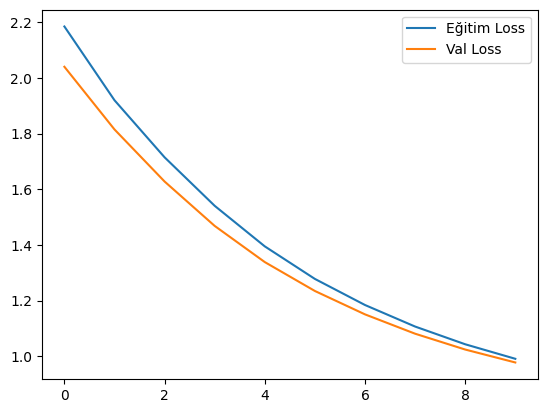

In [19]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

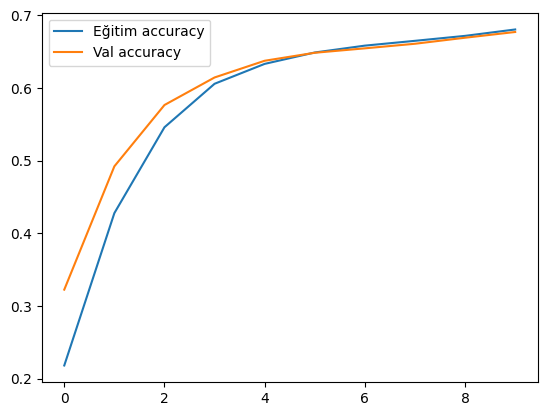

In [20]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical


(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(-1, 28 * 28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28 * 28).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
 
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy']) # Aradaki fark belli olsun diye adagrad yöntemini de kullandık.


hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.5372 - loss: 1.5437 - val_accuracy: 0.7274 - val_loss: 0.8232
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.7524 - loss: 0.7646 - val_accuracy: 0.7714 - val_loss: 0.6902
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - accuracy: 0.7861 - loss: 0.6593 - val_accuracy: 0.7878 - val_loss: 0.6310
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 946us/step - accuracy: 0.8027 - loss: 0.6019 - val_accuracy: 0.7987 - val_loss: 0.5961
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.8085 - loss: 0.5720 - val_accuracy: 0.8054 - val_loss: 0.5736
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 874us/step - accuracy: 0.8168 - loss: 0.5468 - val_accuracy: 0.8106 - val_loss: 0.5557
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.8208 - loss: 0.5304 - val_accuracy: 0.8148 - val_loss: 0.5430
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.8229 -

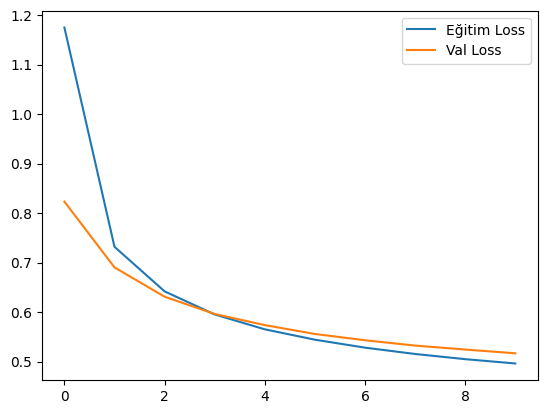

In [22]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

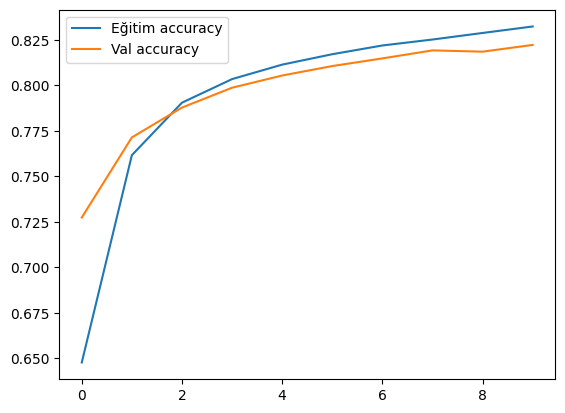

In [23]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

10-CNN Modeli

In [24]:
## CNN Modeli Oluşturduk
from tensorflow.keras.layers import Conv2D, Dense, Flatten, \
                                    Concatenate, GlobalMaxPooling2D, \
                                    MaxPooling2D, GlobalAveragePooling2D, \
                                    AveragePooling2D,Dropout

In [25]:
model=tf.keras.Sequential([
        tf.keras.layers.InputLayer((28,28,1)),
        tf.keras.layers.Rescaling(1/255.0),

        Conv2D(8,3,activation="relu"),
        MaxPooling2D((2,2)),
        Conv2D(16,3,activation="relu"),
        MaxPooling2D((2,2)),
        Flatten(),

        Dense(10,activation="softmax")
    ])


model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,258 (20.54 KB)

 Trainable params: 5,258 (20.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Veriyi yükledik ve Ön-işlemeden geçirdik.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary() 

# Compile ettik
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy']) # Yine adadelta yöntemini kullanarak gözlem yaptık

# Eğittik
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

# Değerlendirme aşamasına soktuk
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0974 - loss: 2.3182 - val_accuracy: 0.1029 - val_loss: 2.2560
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1479 - loss: 2.2499 - val_accuracy: 0.3206 - val_loss: 2.1991
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2024 - loss: 2.1876 - val_accuracy: 0.4612 - val_loss: 2.1343
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2542 - loss: 2.1216 - val_accuracy: 0.4987 - val_loss: 2.0553
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3087 - loss: 2.0374 - val_accuracy: 0.5142 - val_loss: 1.9596
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3451 - loss: 1.9585 - val_accuracy: 0.5240 - val_loss: 1.8528
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3816 - loss: 1.8637 - val_accuracy: 0.5282 - val_loss: 1.7425
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3998 - loss: 1.7680

11-CNN Görselleştirme

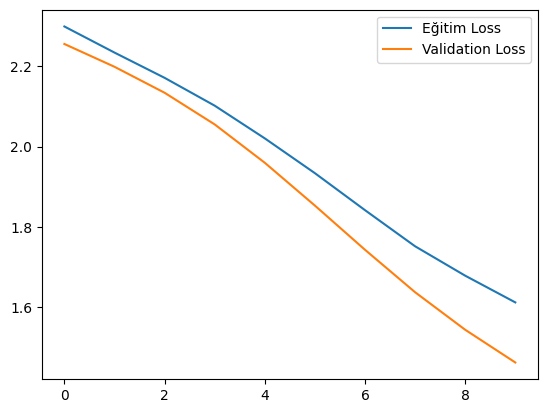

In [27]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

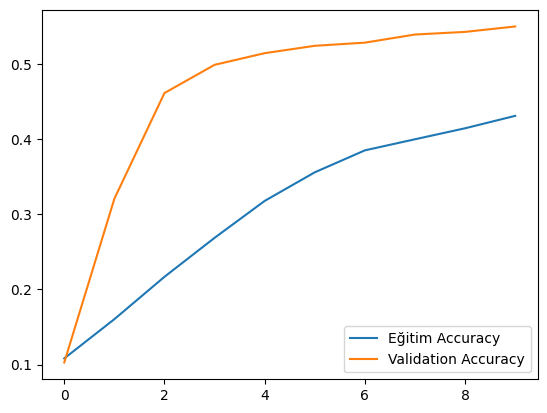

In [28]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # burada da diğer model biraz kötü performans verdiği için başka model denendik

# Train the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7083 - loss: 0.8014 - val_accuracy: 0.8604 - val_loss: 0.3789
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8485 - loss: 0.4192 - val_accuracy: 0.8821 - val_loss: 0.3228
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8683 - loss: 0.3609 - val_accuracy: 0.8889 - val_loss: 0.2974
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8789 - loss: 0.3325 - val_accuracy: 0.8979 - val_loss: 0.2794
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8849 - loss: 0.3145 - val_accuracy: 0.8987 - val_loss: 0.2757
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8885 - loss: 0.3009 - val_accuracy: 0.8996 - val_loss: 0.2694
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8962 - loss: 0.2877 - val_accuracy: 0.8991 - val_loss: 0.2691
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8969 - loss: 0.2810 -

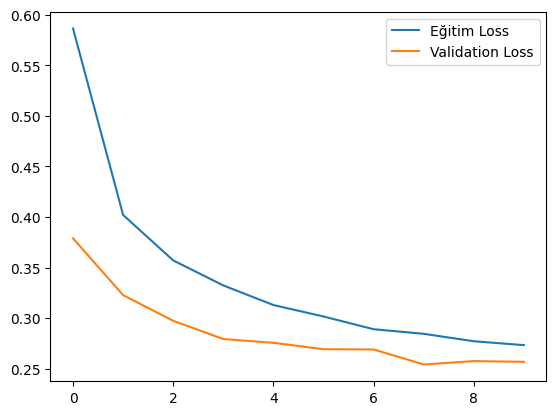

In [33]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

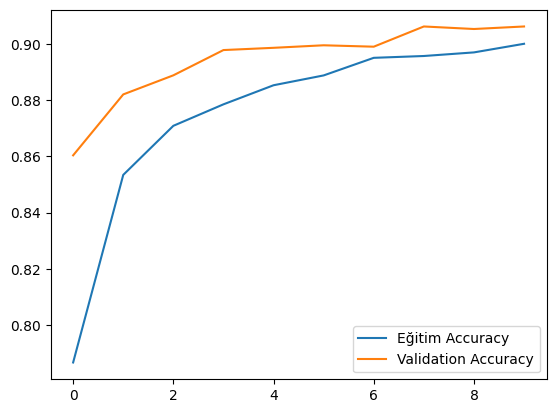

In [34]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()